In [1]:
from data_generation.gen_data import *
from model.utils import *

import seaborn as sns
import numpy as np

In [4]:
num_days = [183]
num_samples = [10000]
ratios = [0.9]
dist = "logistic"
mode = "histogram"
folder = "test"

num_days_num_samples_ratios = [(num_day, num_sample, ratio) for num_day in num_days for num_sample in num_samples for ratio in ratios]

for num_day, num_sample, ratio in tqdm(num_days_num_samples_ratios):
    data = generate_data(num_day, num_sample, dist=dist, mode=mode, normal_ratio=ratio, visualize=False)
    with open(f"../data/{folder}/{dist}/old_{mode}/{dist}_{num_day}_days_{num_sample}_samples_{int(ratio*100)}.npy", "wb") as f:
        np.save(f, data)

  0%|          | 0/1 [00:00<?, ?it/s]

Generating logistic distribution, 183 days, 10000 samples...


100%|██████████| 1/1 [00:22<00:00, 22.62s/it]


# Converting plain to histogram data

In [3]:
data_path = f"../data/{folder}/{mode}/{dist}_{num_day}_days_{num_sample}_samples_{int(ratio*100)}.npy"
data = np.load(data_path)
data.shape

(60, 100001)

In [4]:
X, y = data[:, :-1], data[:, -1]
print(X.shape)
print(y.shape)

(60, 100000)
(60,)


In [5]:
min_edge, max_edge = 300, 850
bin_edges = np.arange(min_edge, max_edge + 1, 1)

new_data = []
for i in range(data.shape[0]):
    new_data.append(np.array(np.histogram(X[i], bins=bin_edges)[0].tolist() + [y[i]]))
new_data = np.array(new_data)
new_data.shape

(60, 551)

In [6]:
with open(f"../data/{folder}/histogram/{dist}_{num_day}_days_{num_sample}_samples_{int(ratio*100)}.npy", "wb") as f:
    np.save(f, new_data)

In [7]:
data_path = f"../data/{folder}/histogram/{dist}_{num_day}_days_{num_sample}_samples_{int(ratio*100)}.npy"
data = np.load(data_path)
data.shape

(60, 551)

# Visualization

In [8]:
data_path = f"../data/{folder}/plain/{dist}_{num_day}_days_{num_sample}_samples_{int(ratio*100)}.npy"
data = np.load(data_path)
data.shape

(60, 100001)

In [9]:
X, y = data[:, :-1], data[:, -1]
print(X.shape)
print(y.shape)

(60, 100000)
(60,)


In [10]:
index_0 = np.where(y == 0)[0]
index_0

array([ 0,  1,  2,  3,  4,  5,  6,  7, 10, 11, 12, 13, 14, 15, 17, 20, 21,
       23, 24, 25, 26, 27, 29, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42,
       43, 44, 45, 48, 50, 53, 54, 55, 56, 57, 58, 59])

In [11]:
index_1 = np.where(y == 1)[0]
index_1

array([ 8,  9, 16, 18, 19, 22, 28, 30, 36, 46, 47, 49, 51, 52])

/tmp/ipykernel_191606/2089088174.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 7))


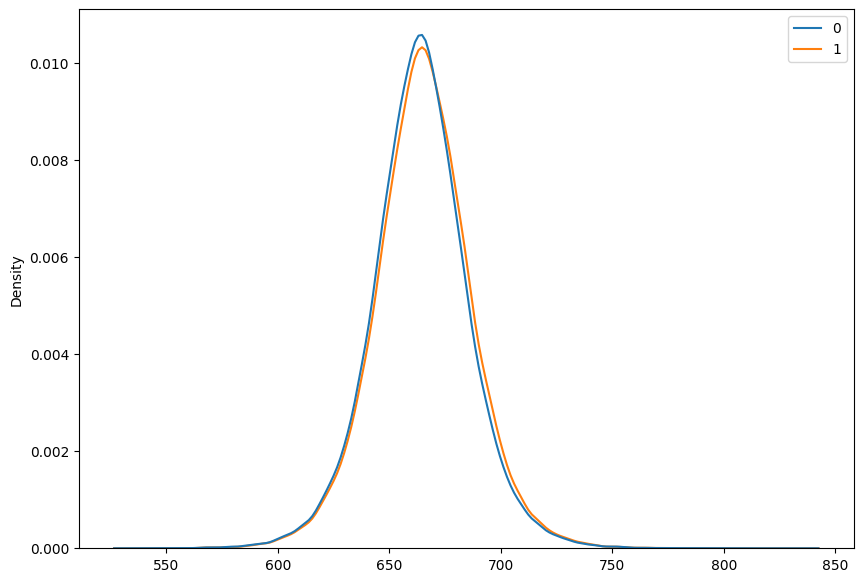

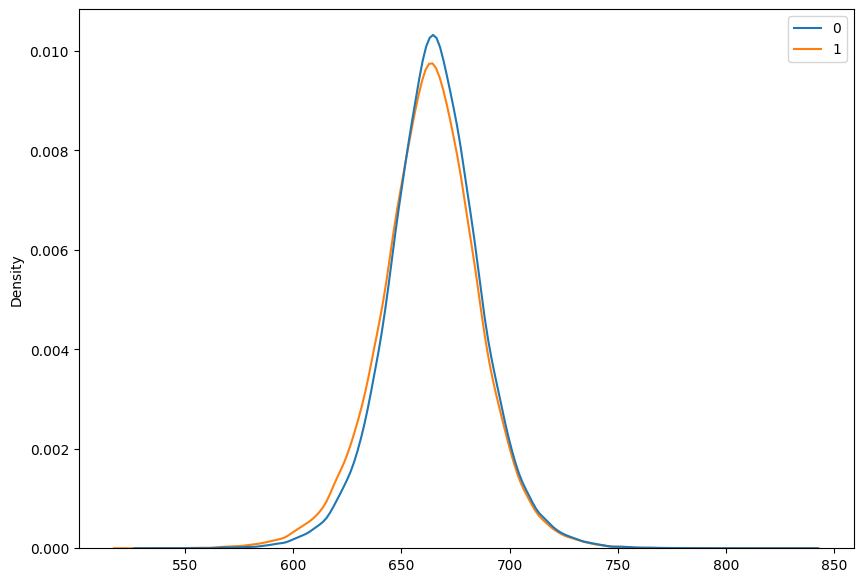

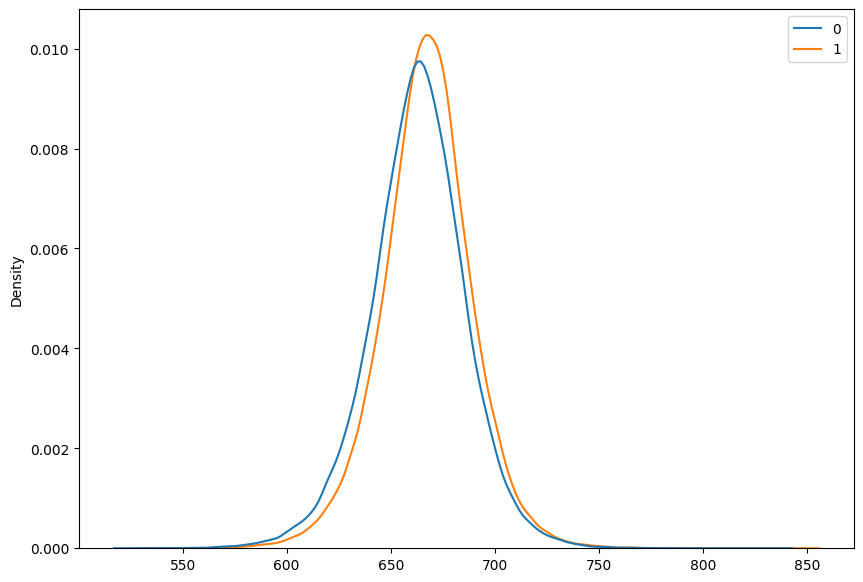

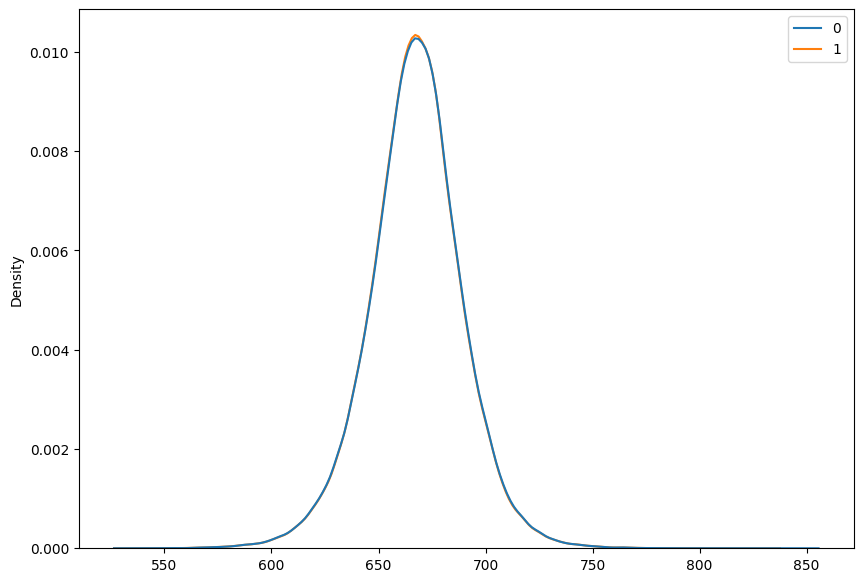

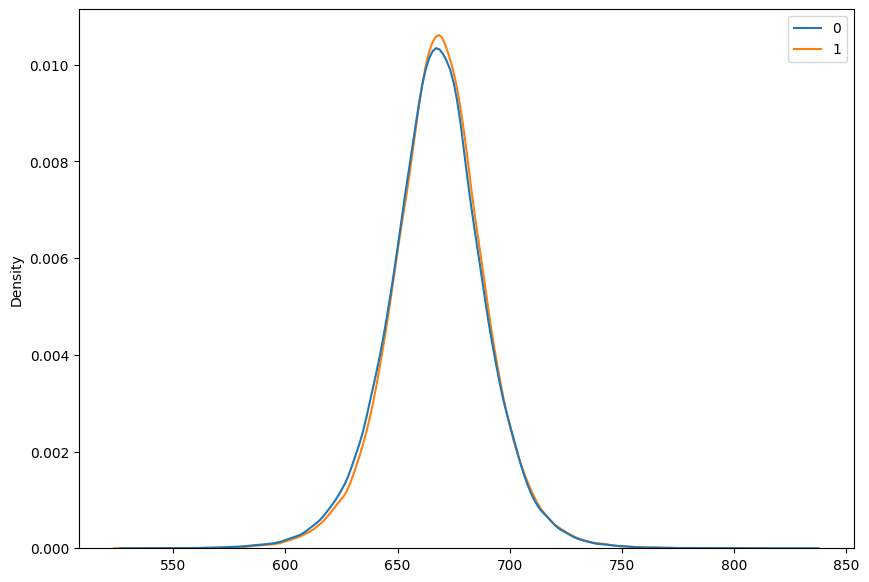

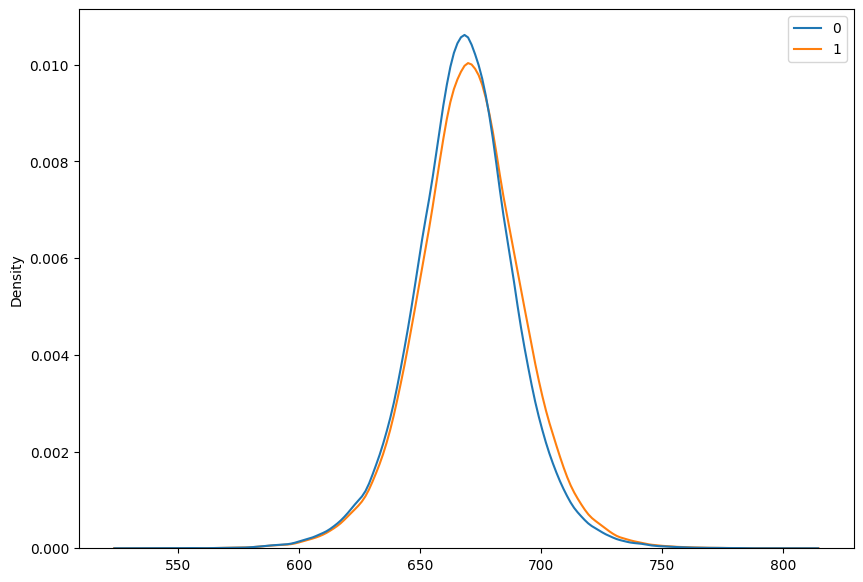

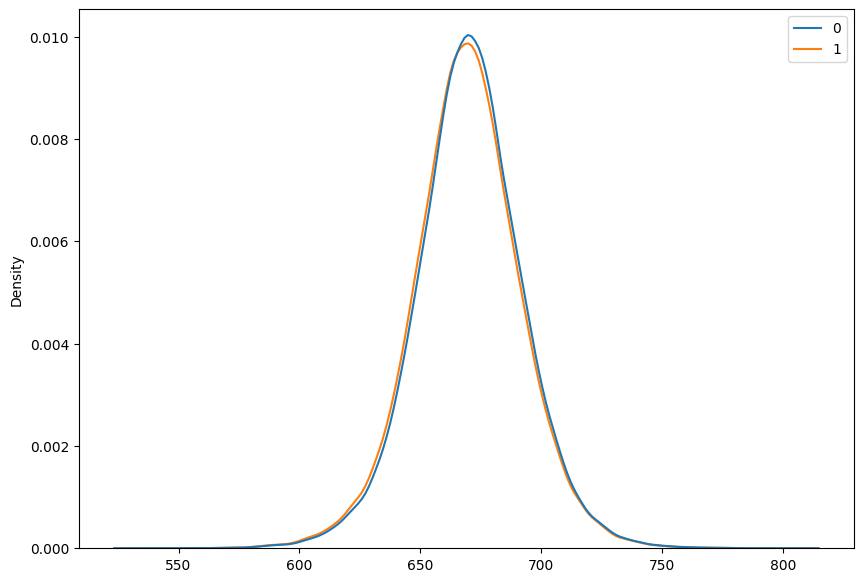

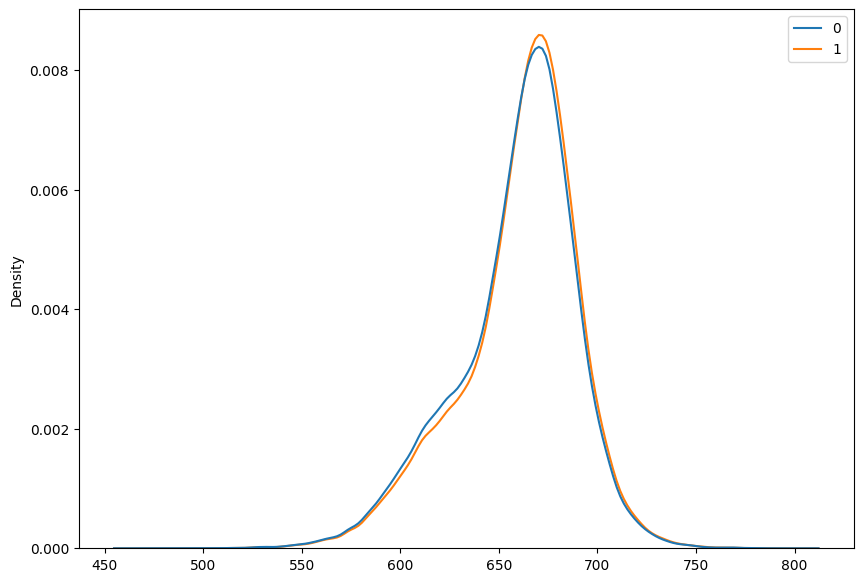

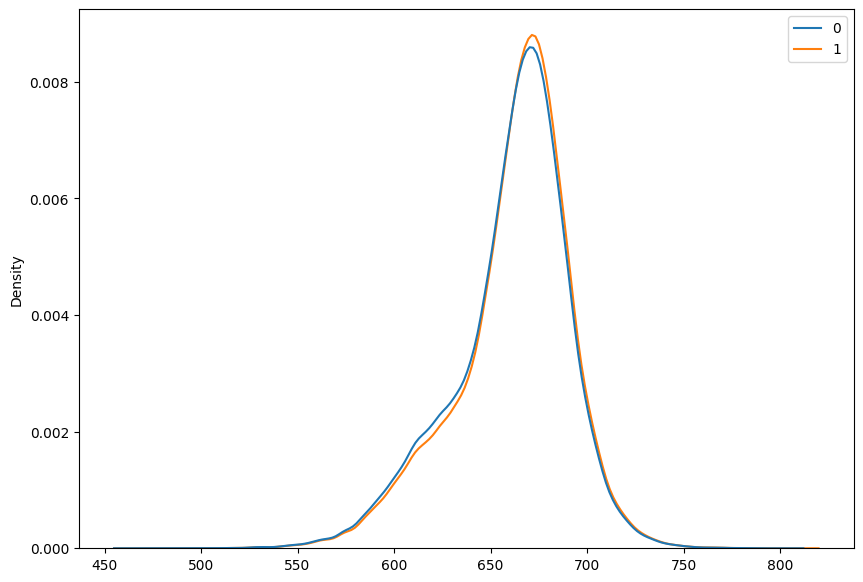

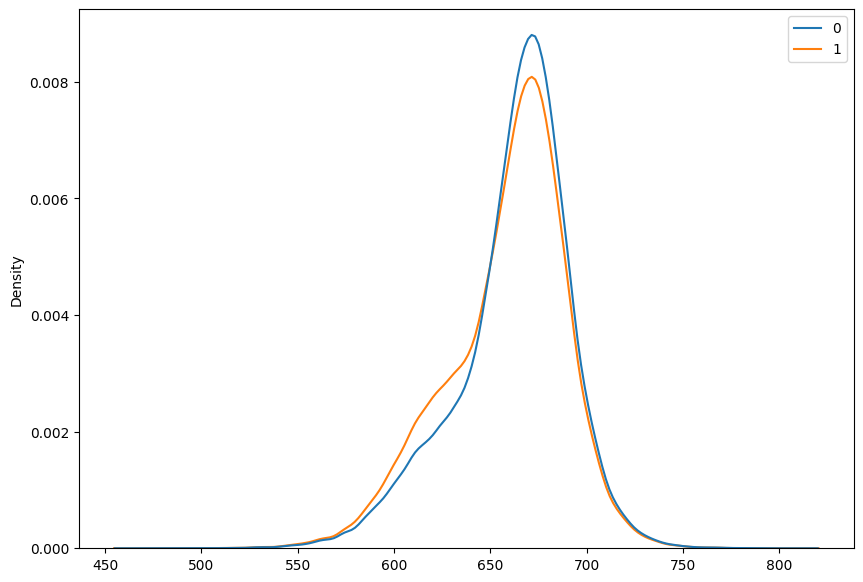

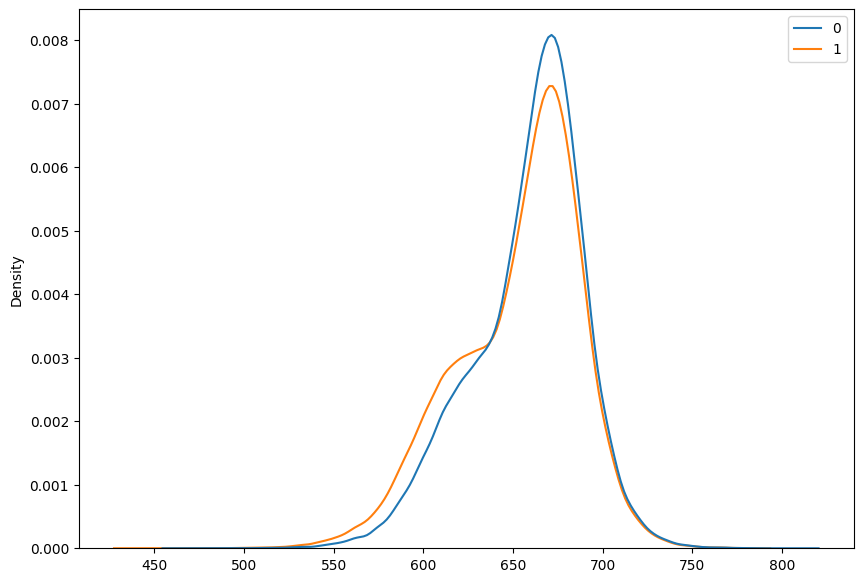

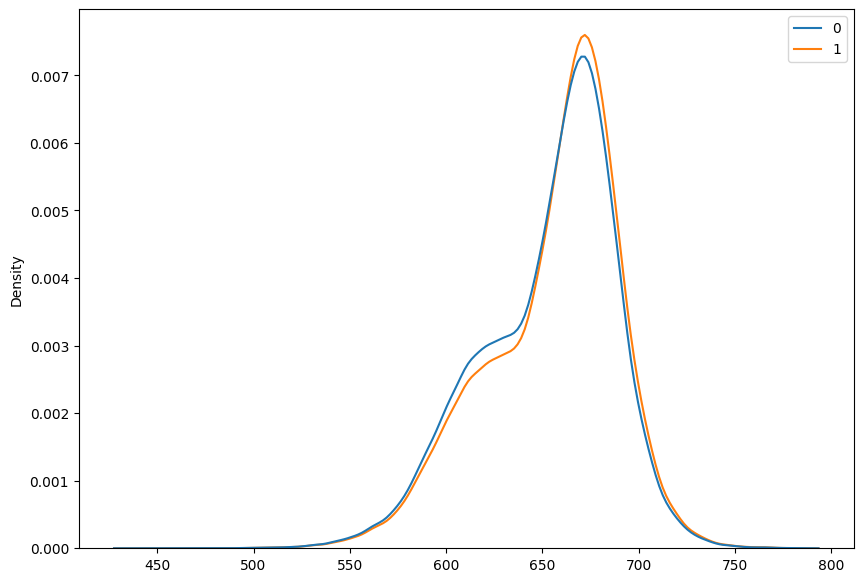

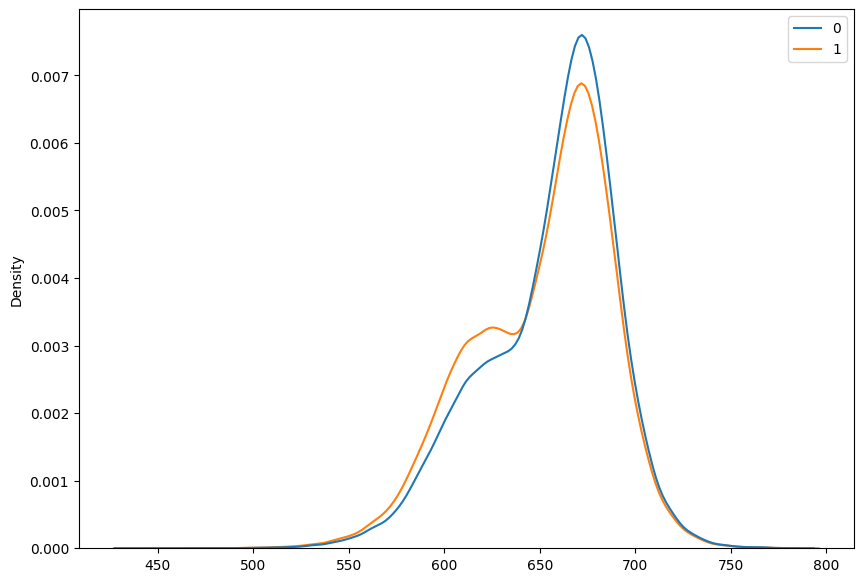

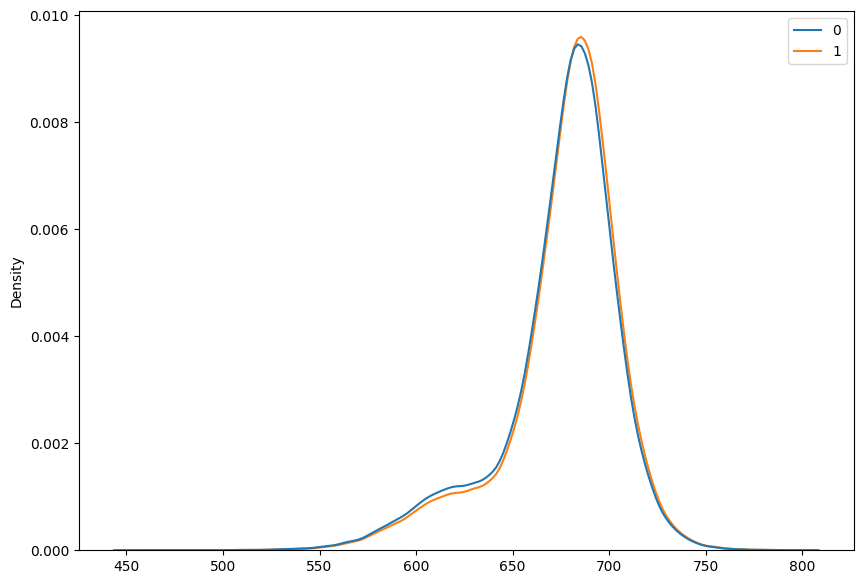

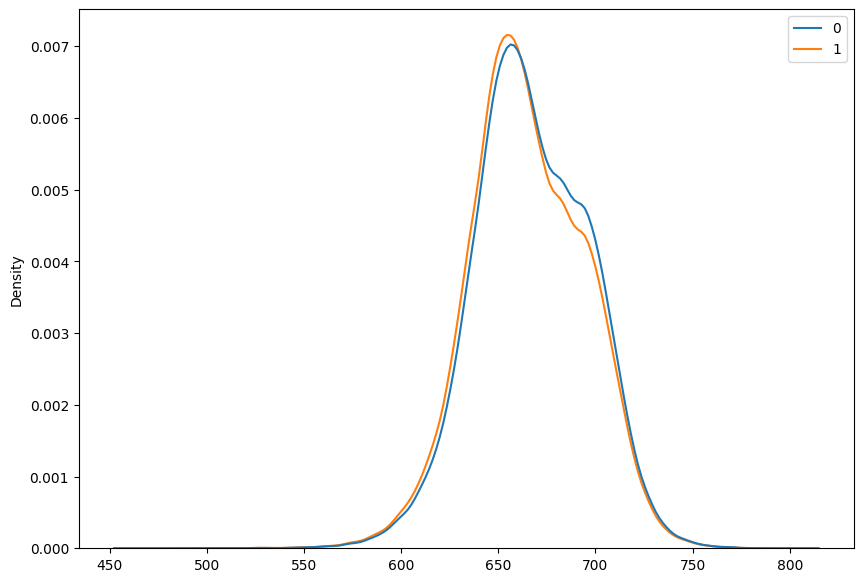

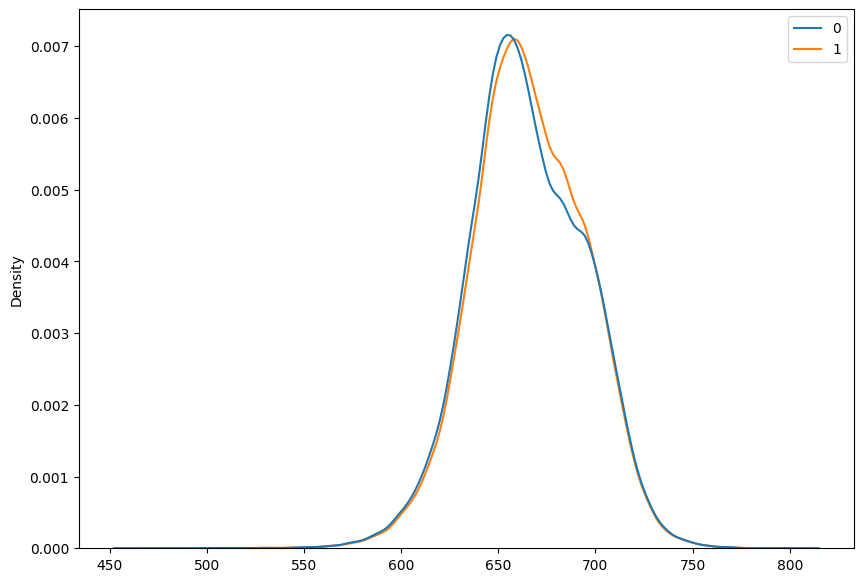

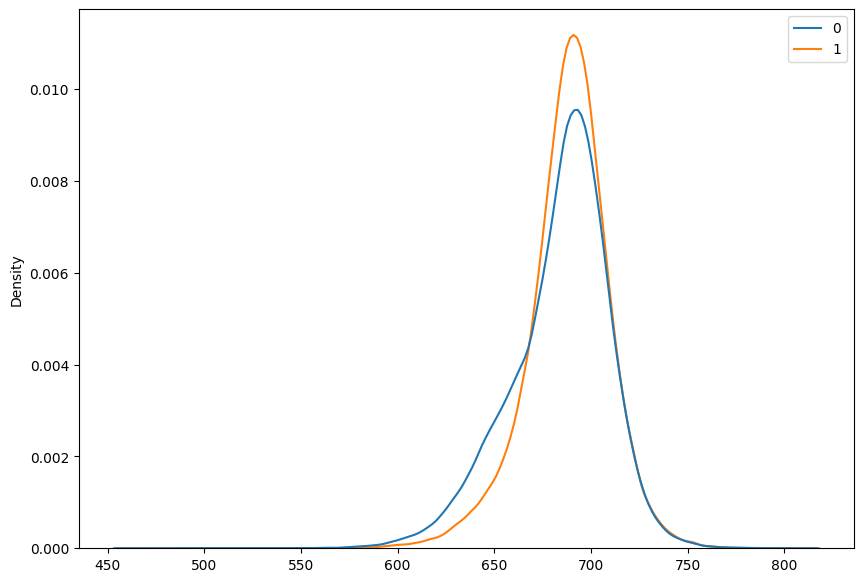

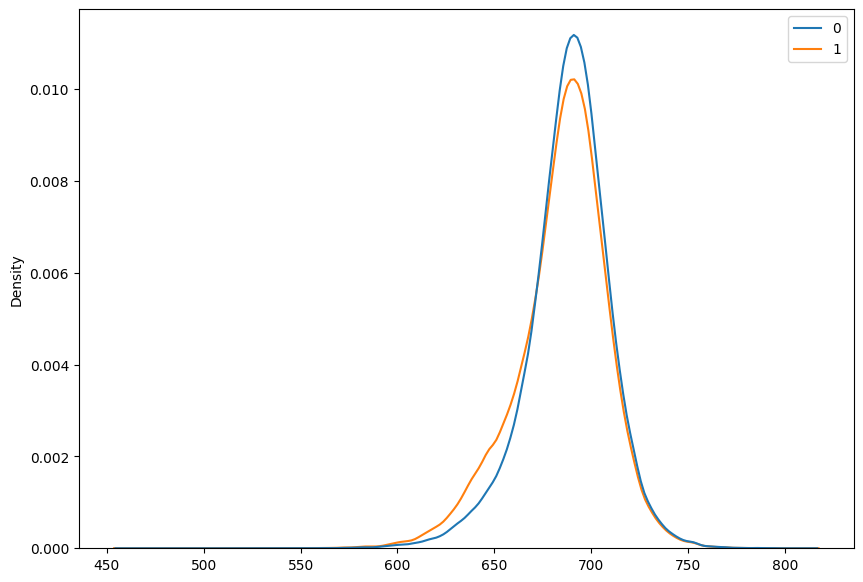

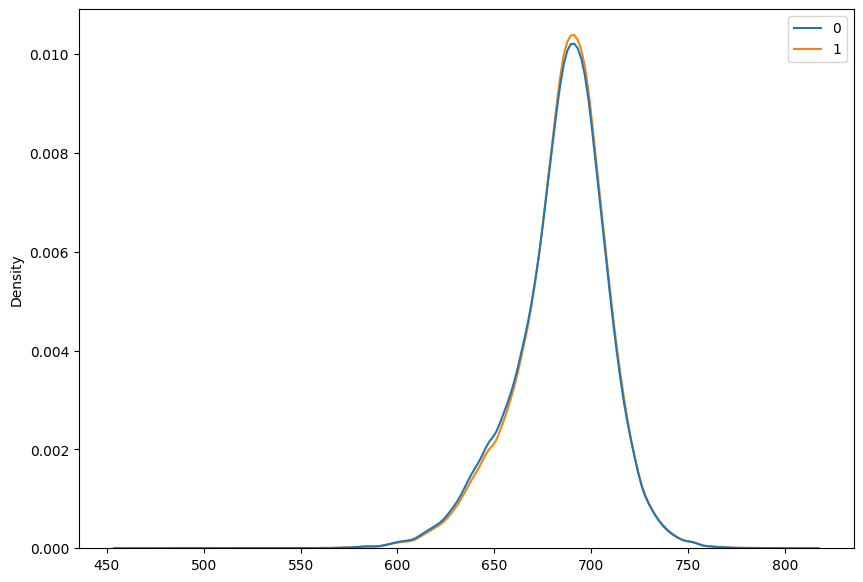

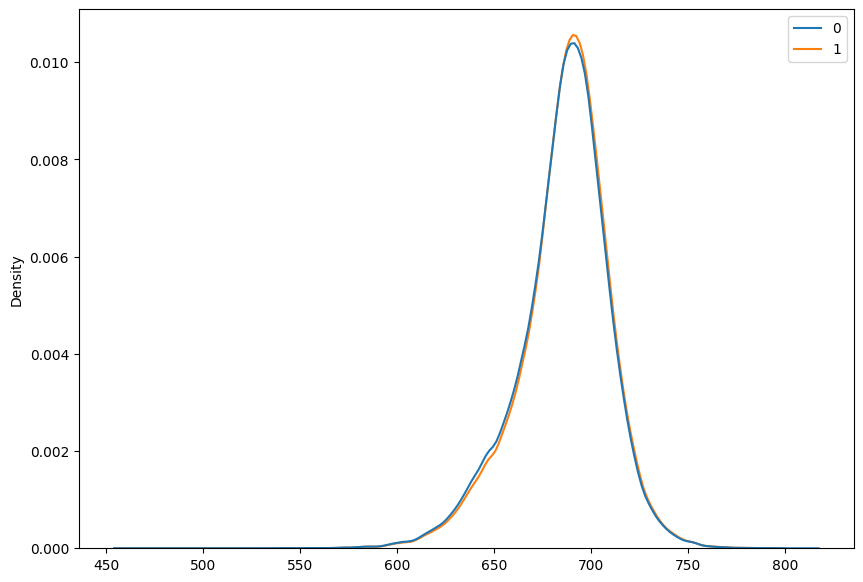

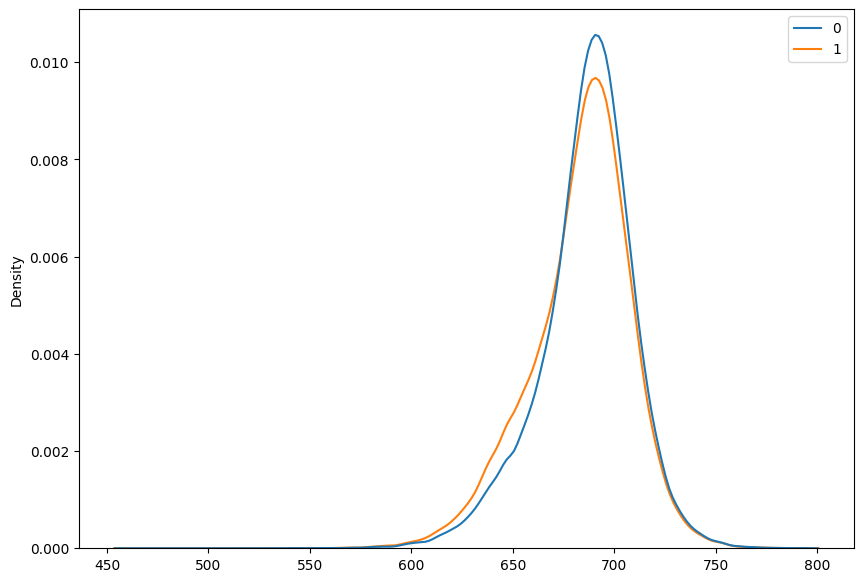

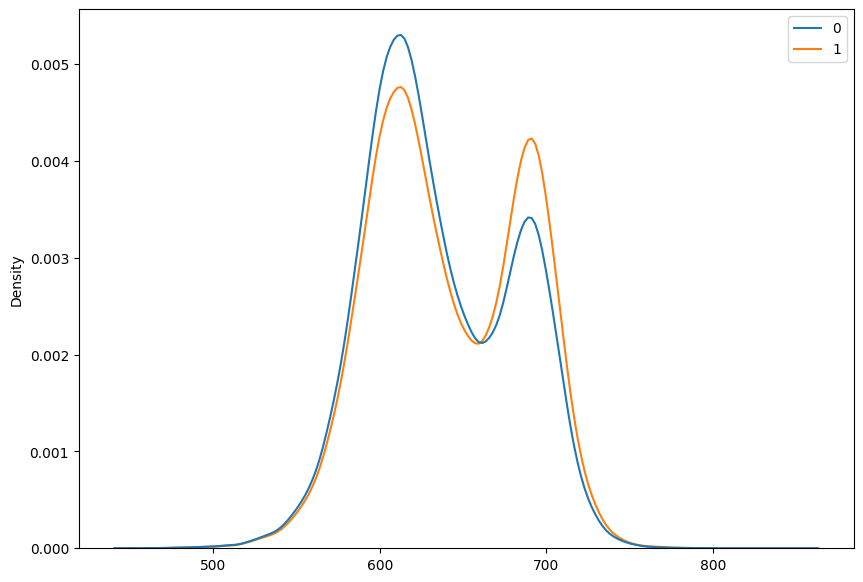

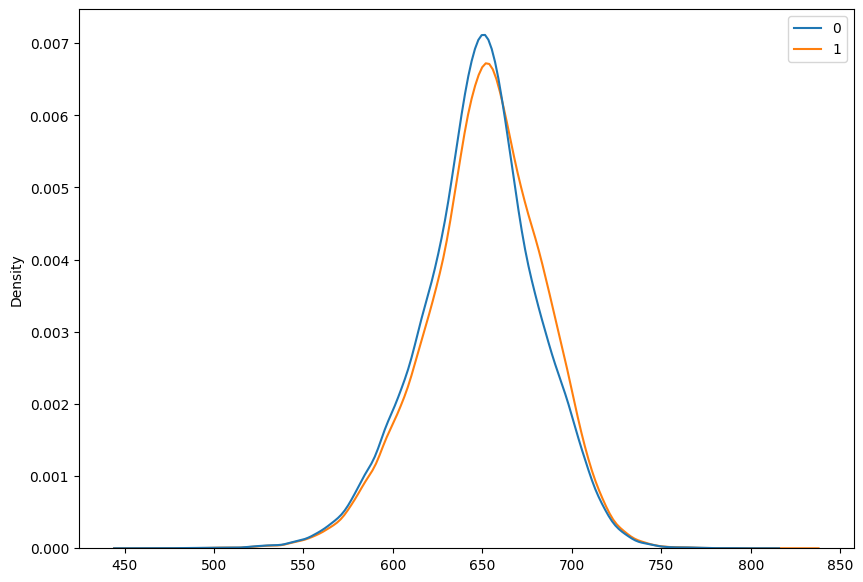

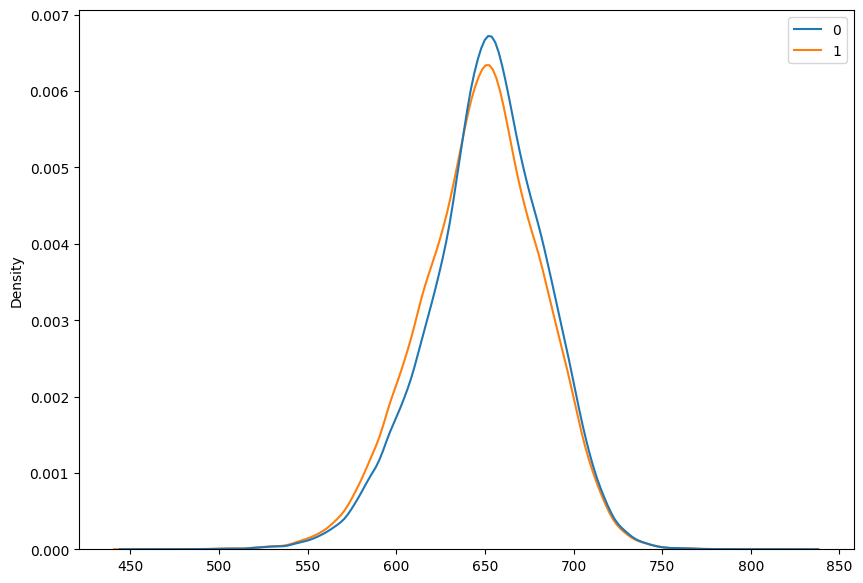

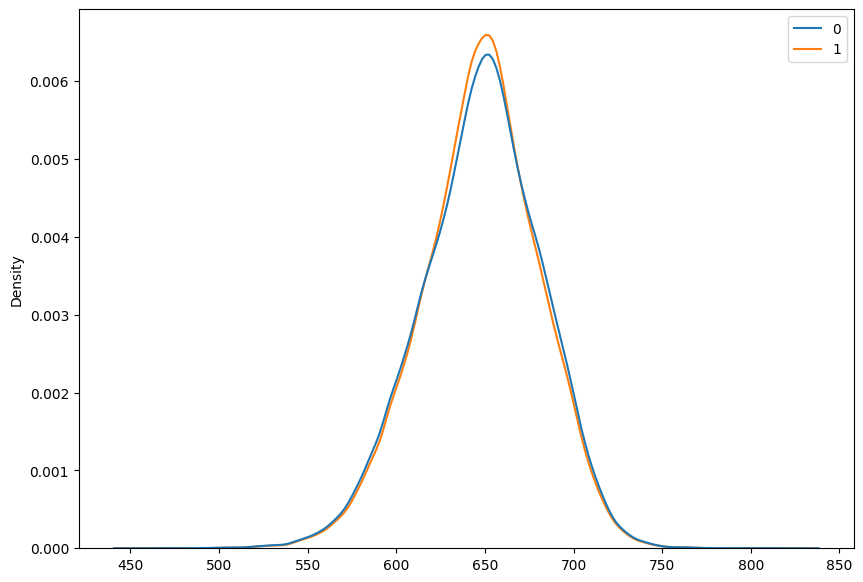

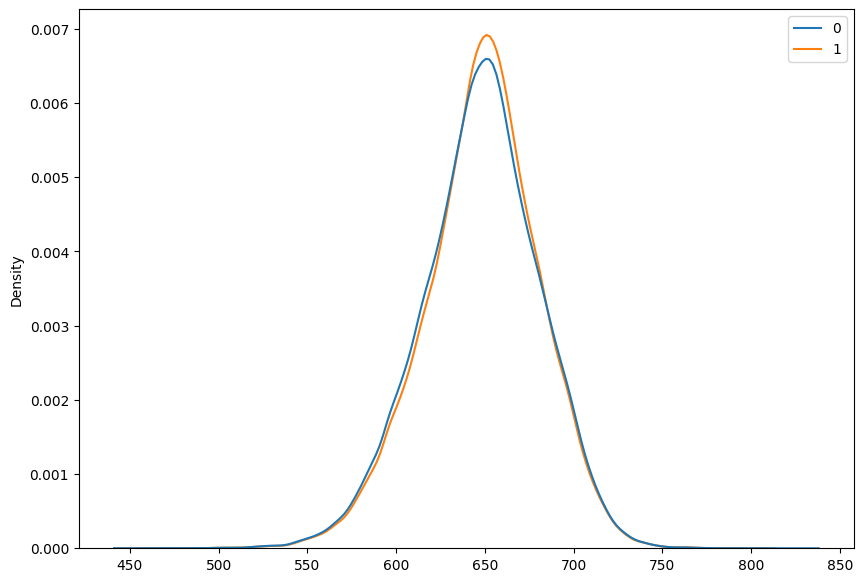

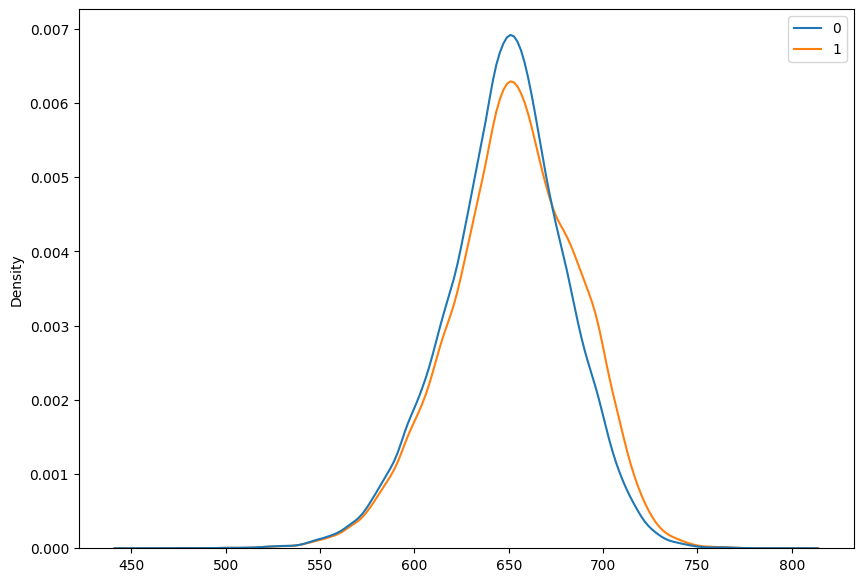

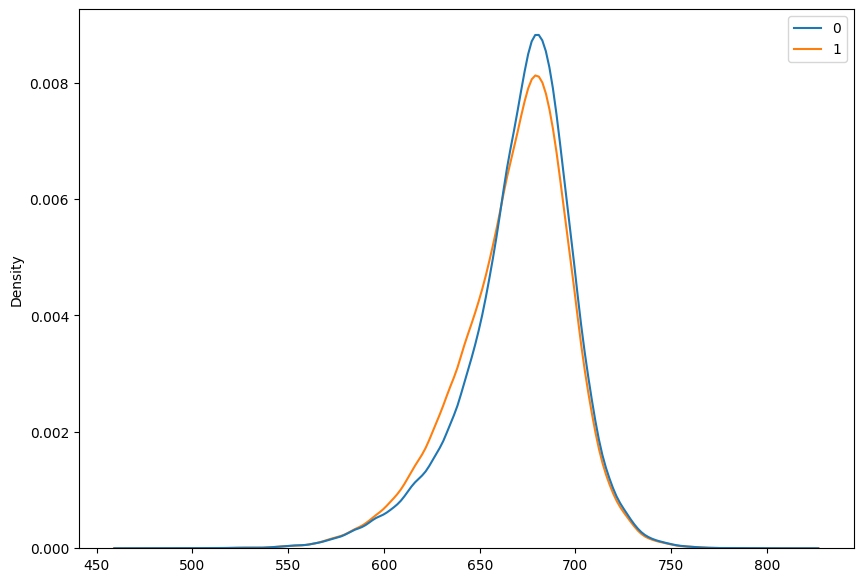

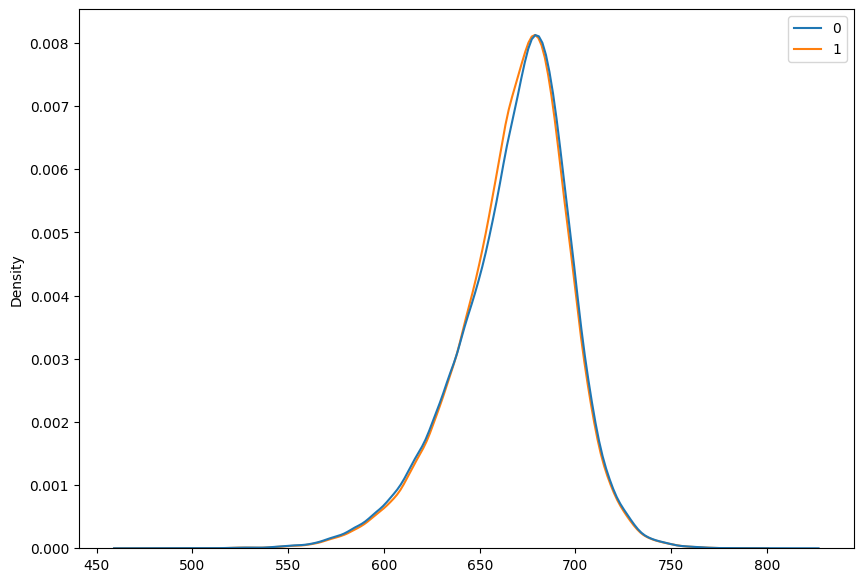

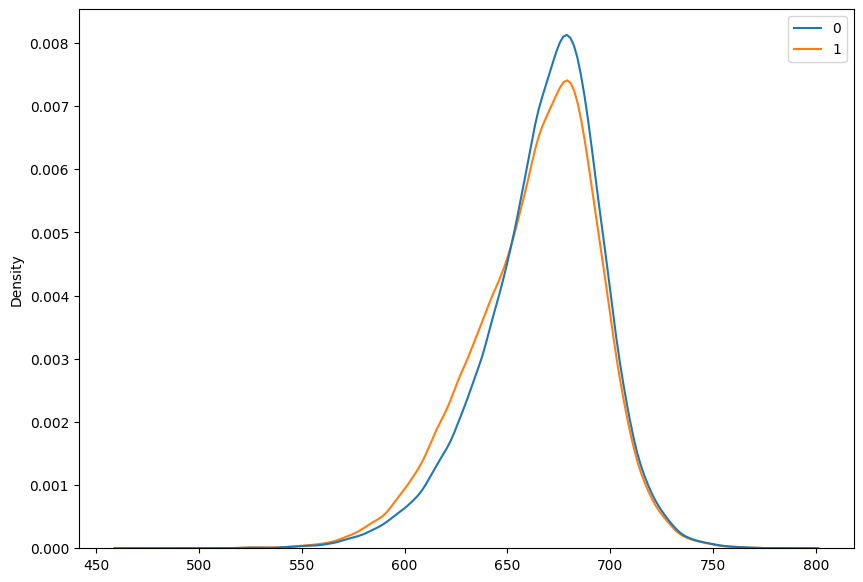

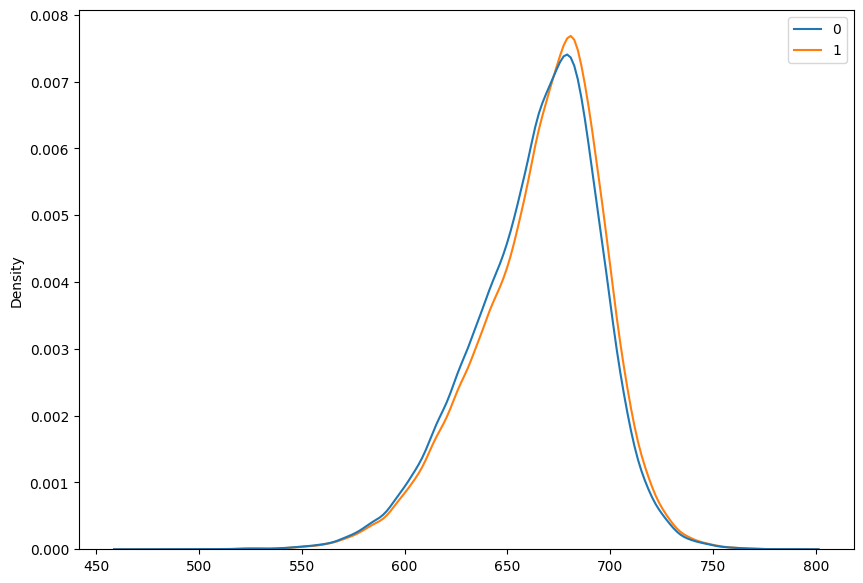

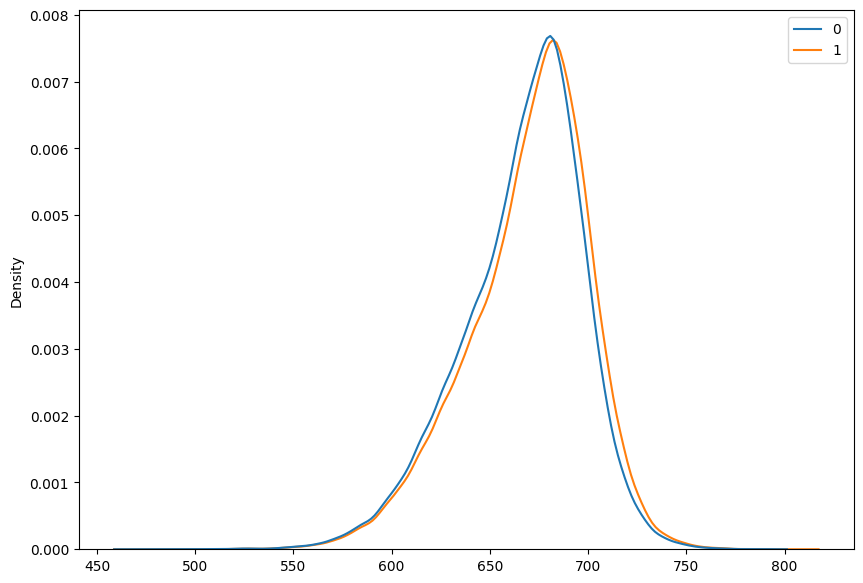

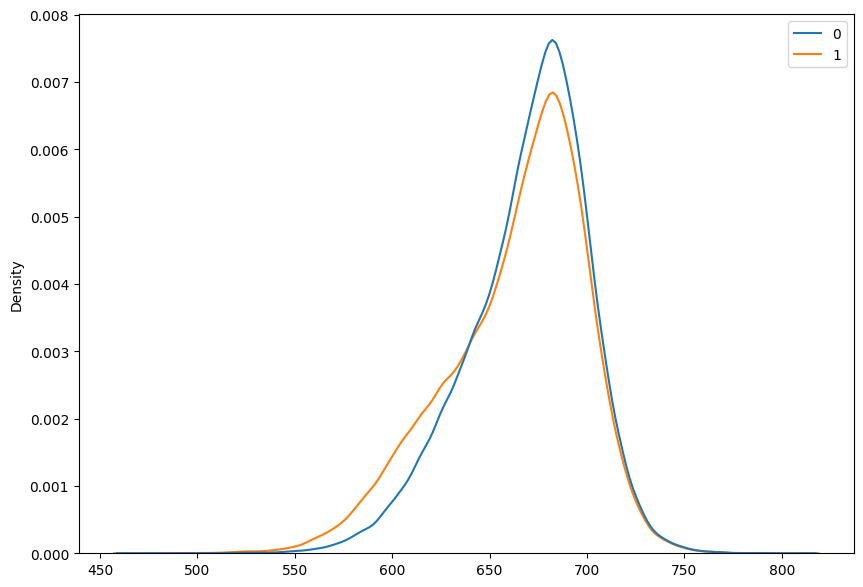

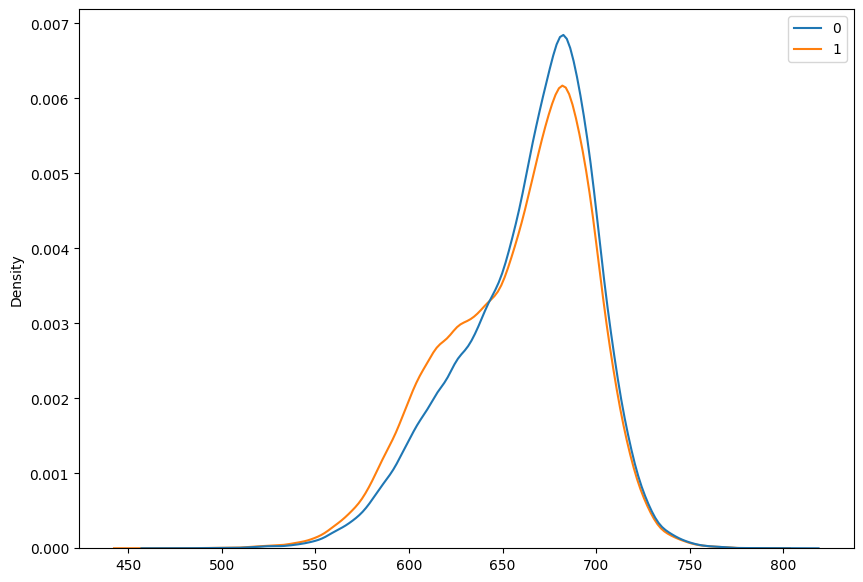

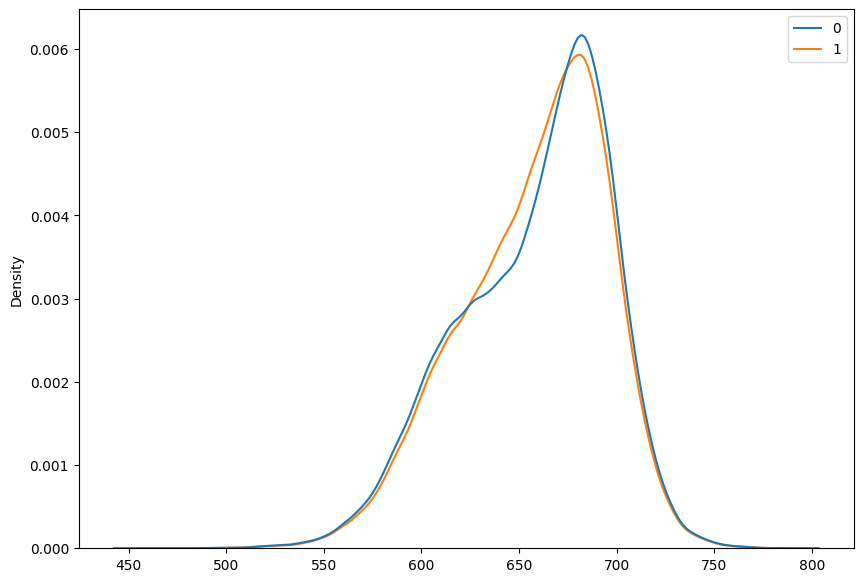

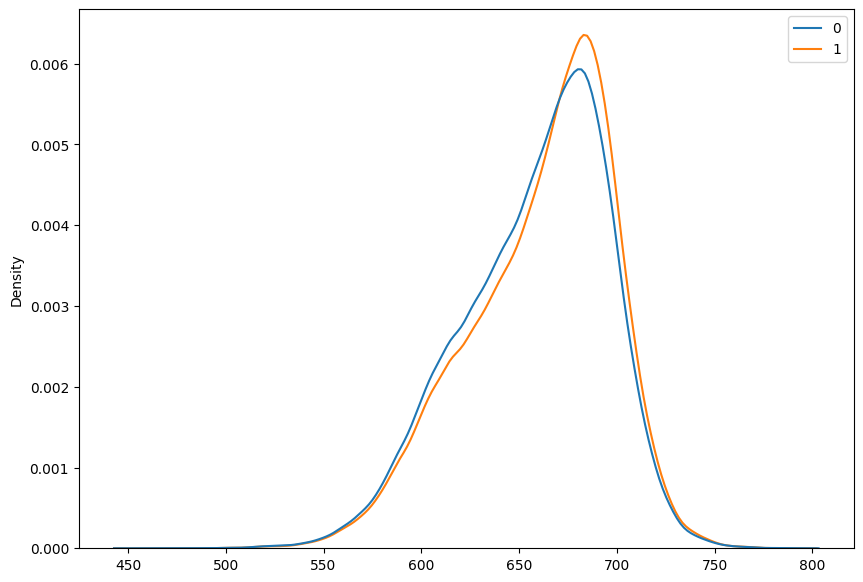

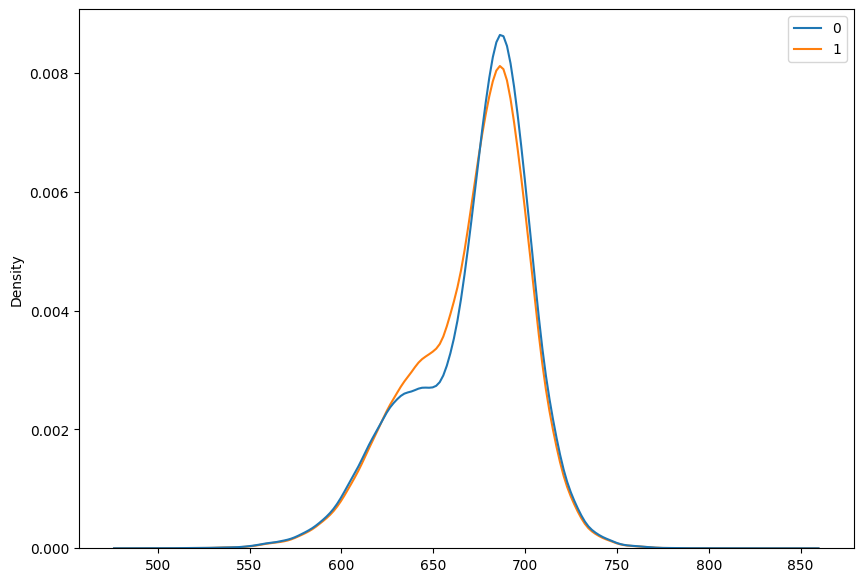

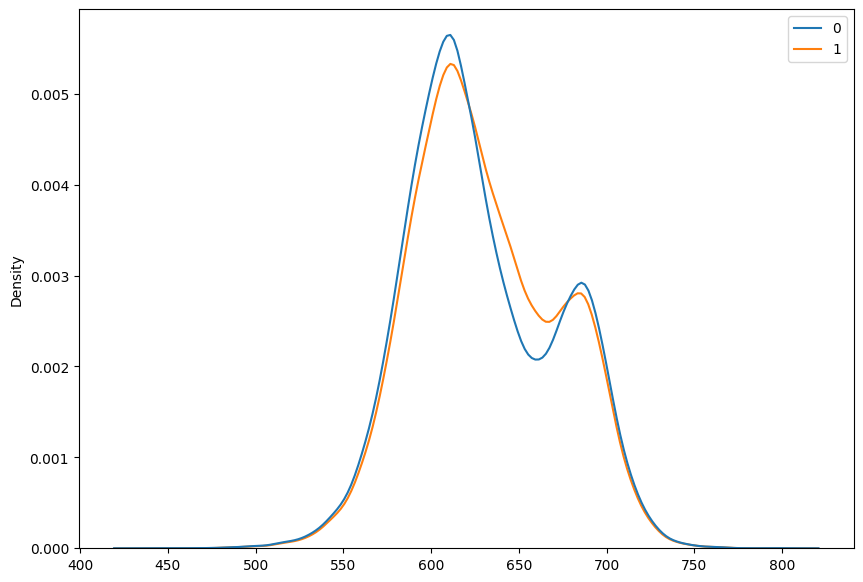

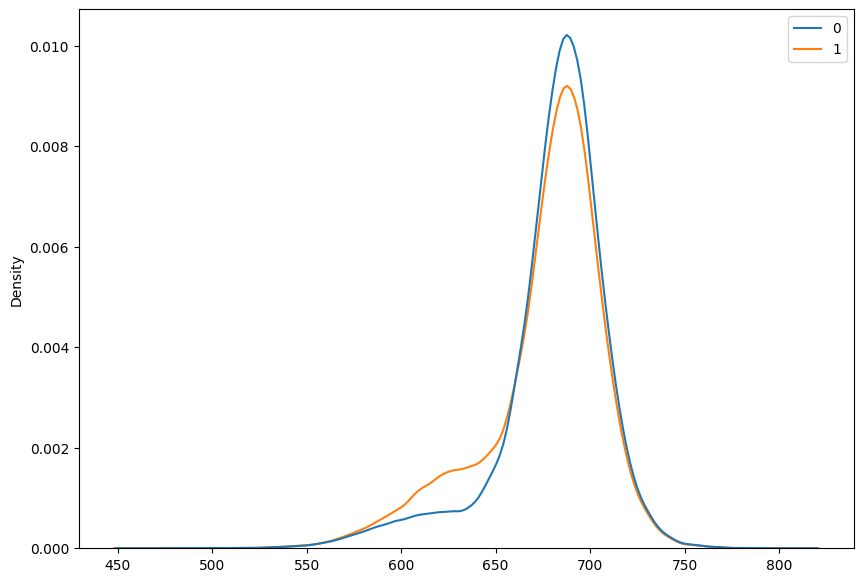

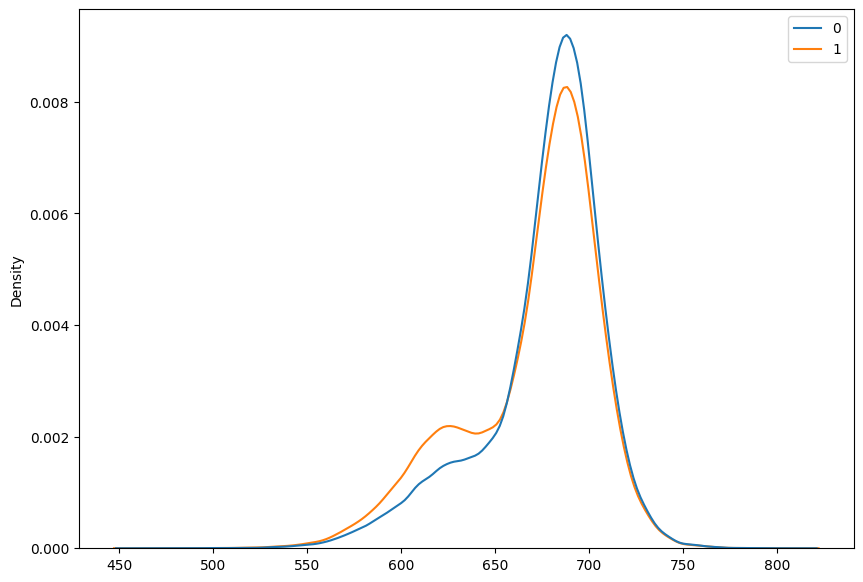

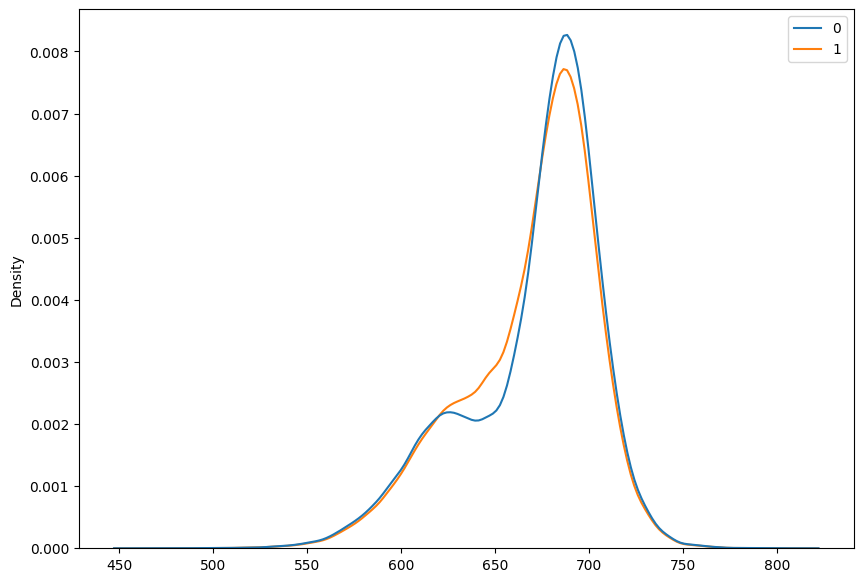

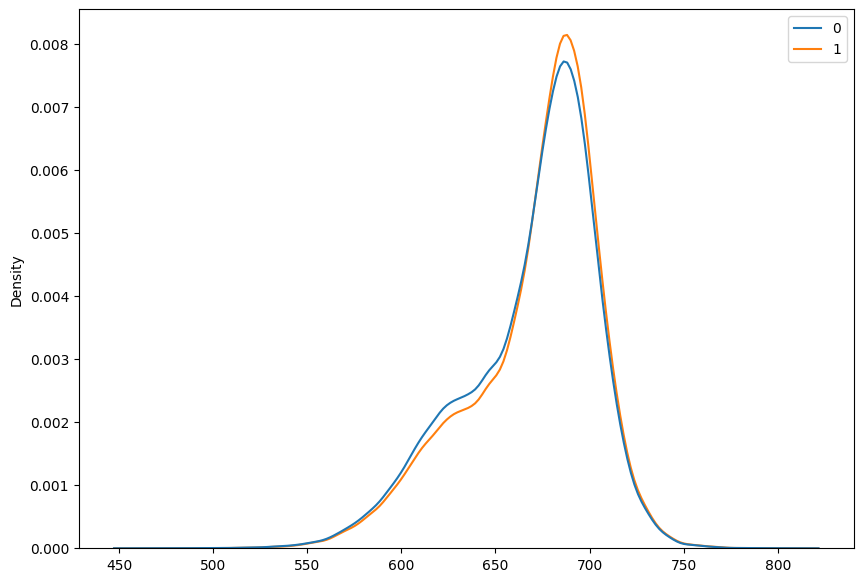

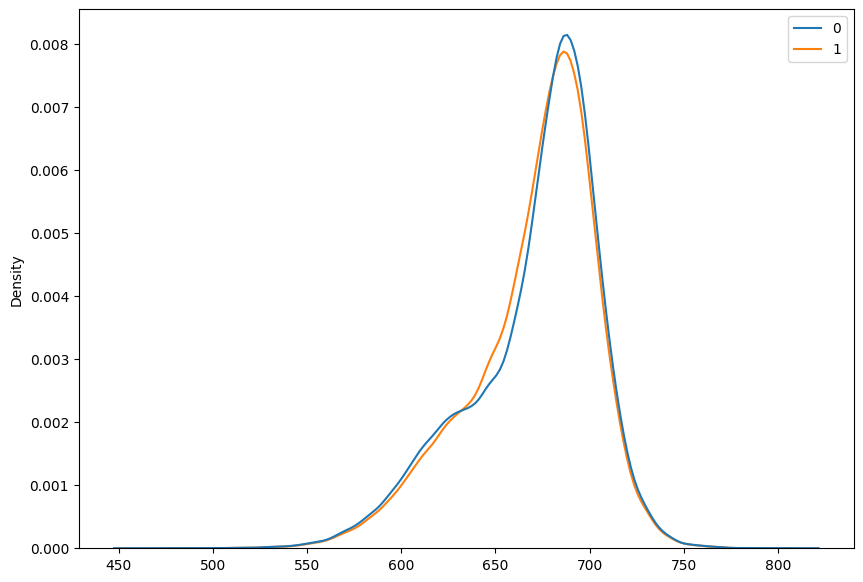

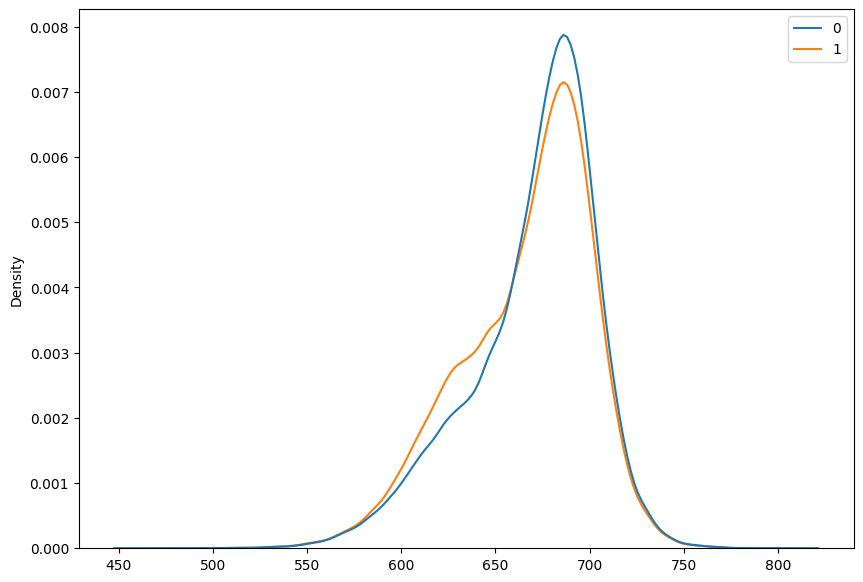

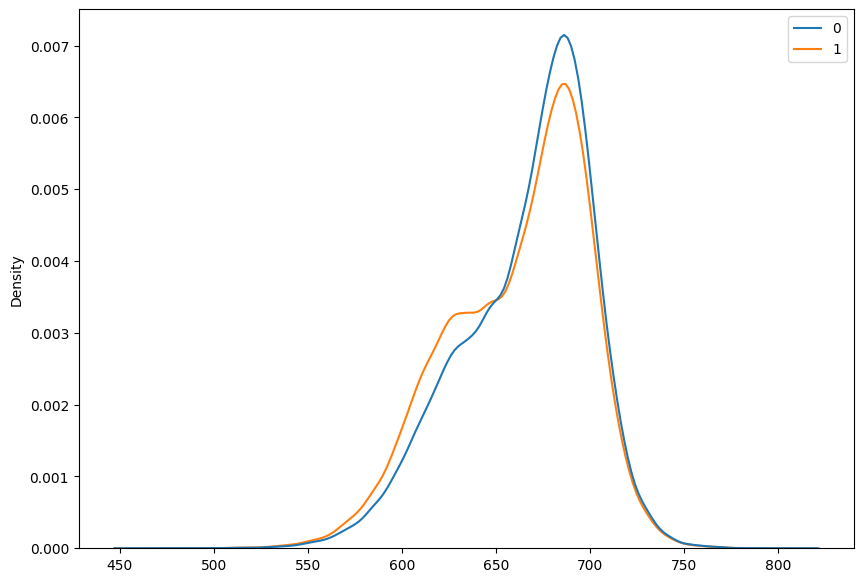

In [12]:
for idx, i in enumerate(index_0[1:]):
    plt.figure(figsize=(10, 7))
    sns.kdeplot([X[i - 1], X[i]])

    # print(idx, y[i])

    # value, is_drift = ks(X[i - 1], X[i])
    # print(value, is_drift)

    # value, is_drift = js(X[i - 1], X[i])
    # print(value, is_drift)

    # value, is_drift = kl_div(X[i - 1], X[i])
    # print(value, is_drift)

    # value, is_drift = psi(X[i - 1], X[i])
    # print(value, is_drift)

    # value, is_drift = wd(X[i - 1], X[i])
    # print(value, is_drift, "\n")

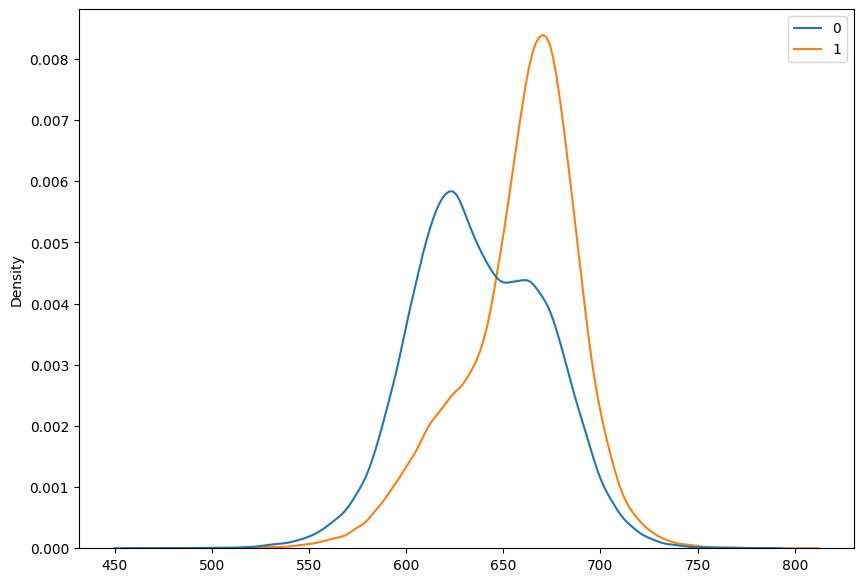

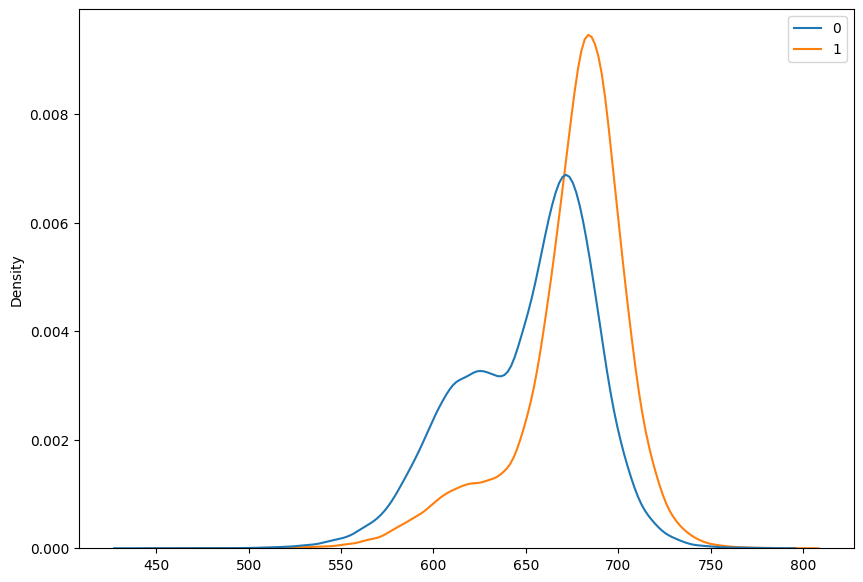

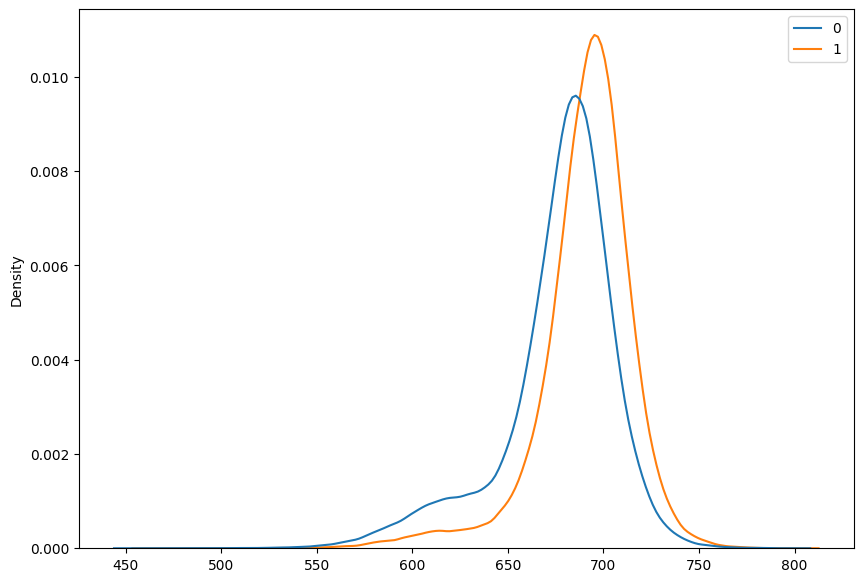

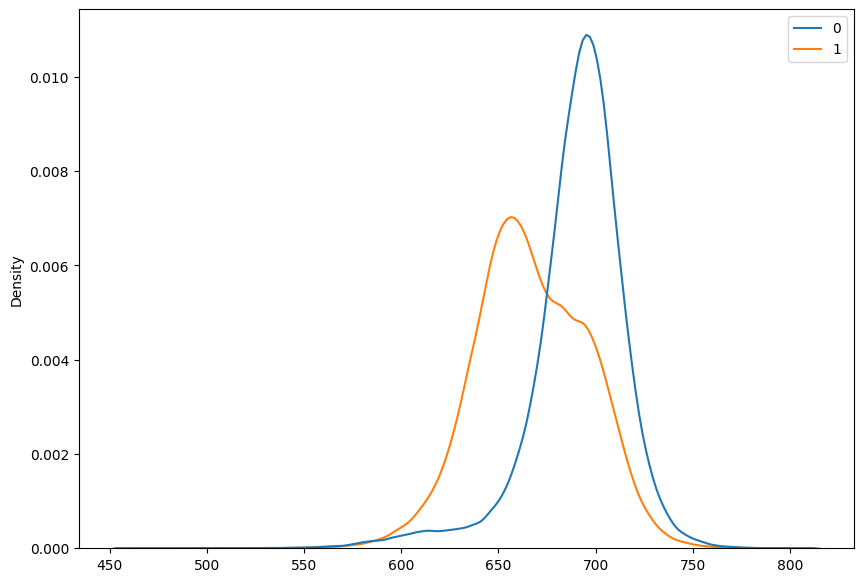

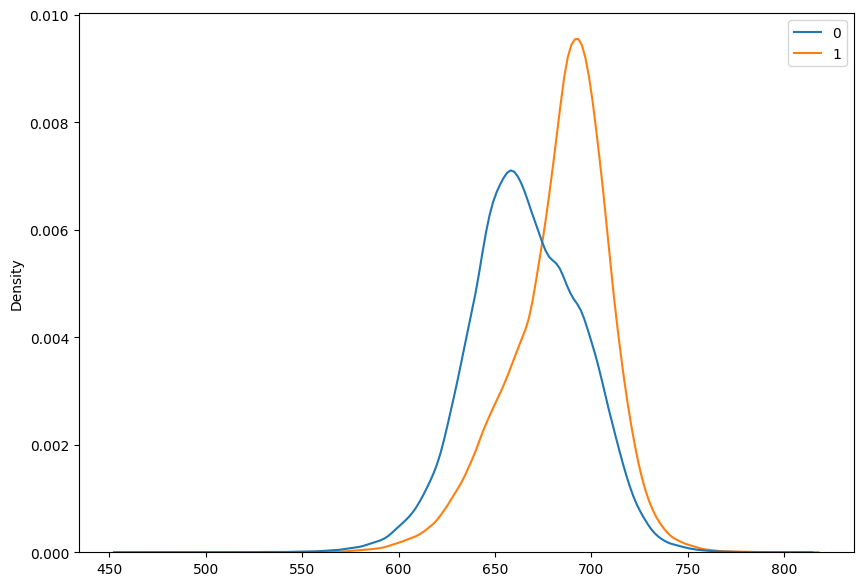

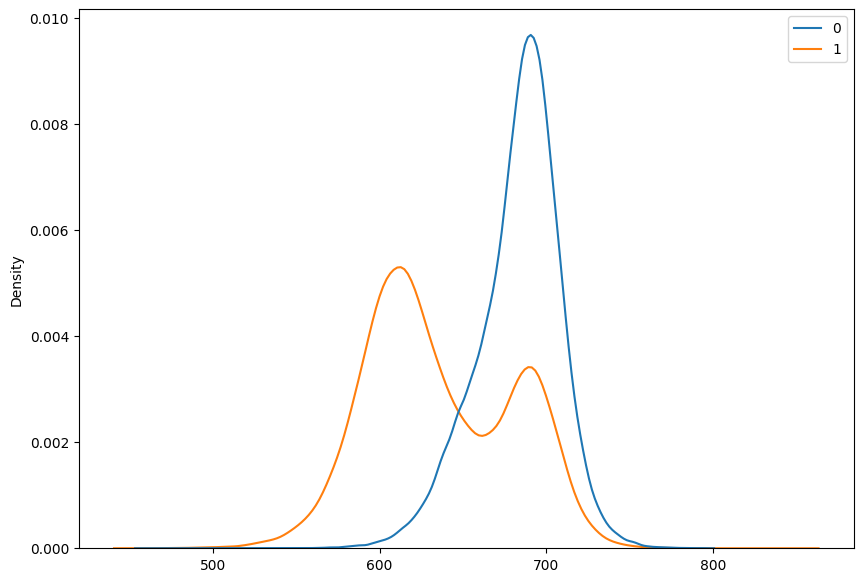

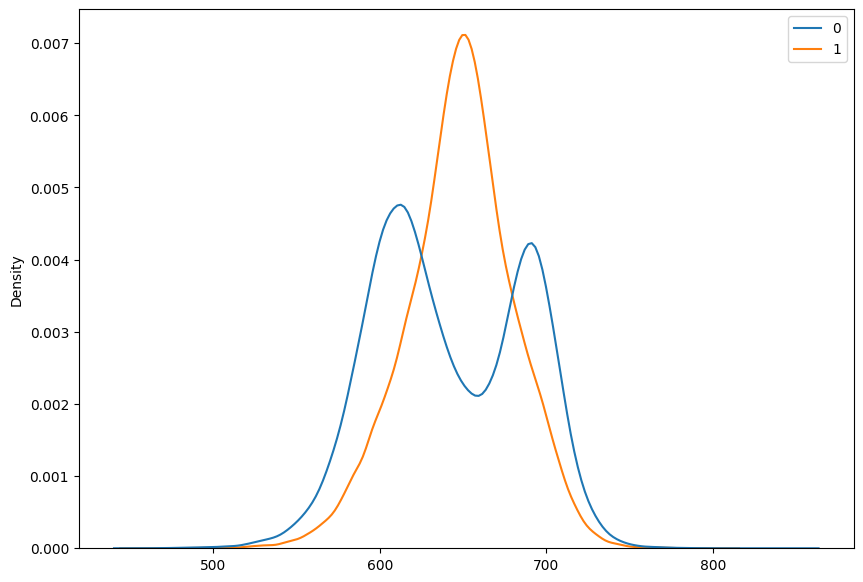

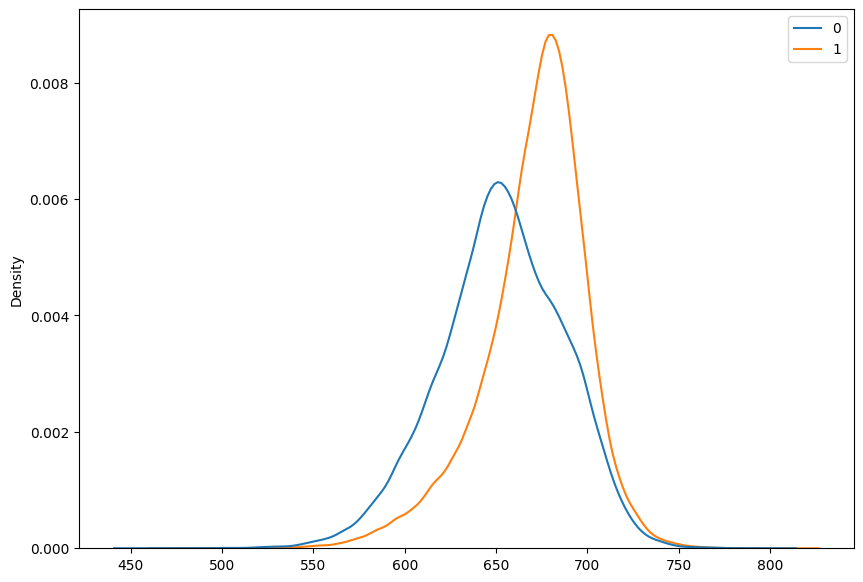

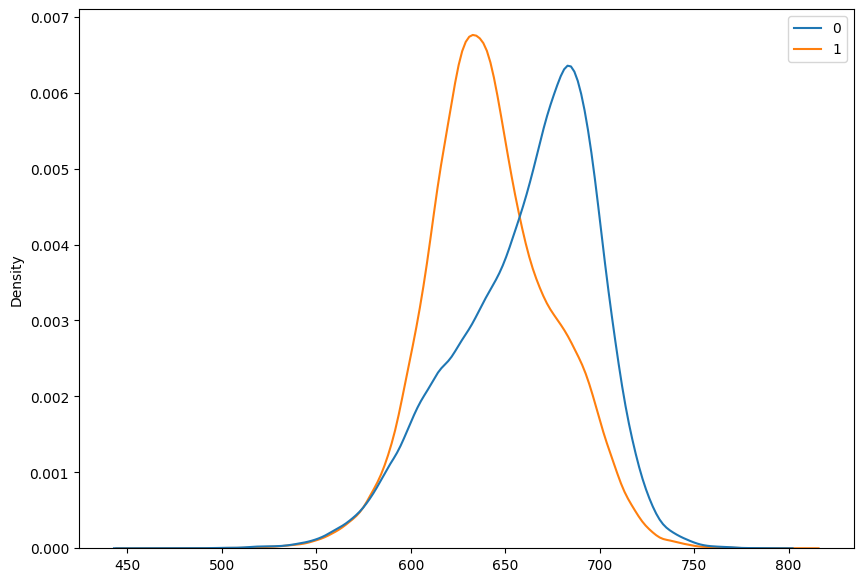

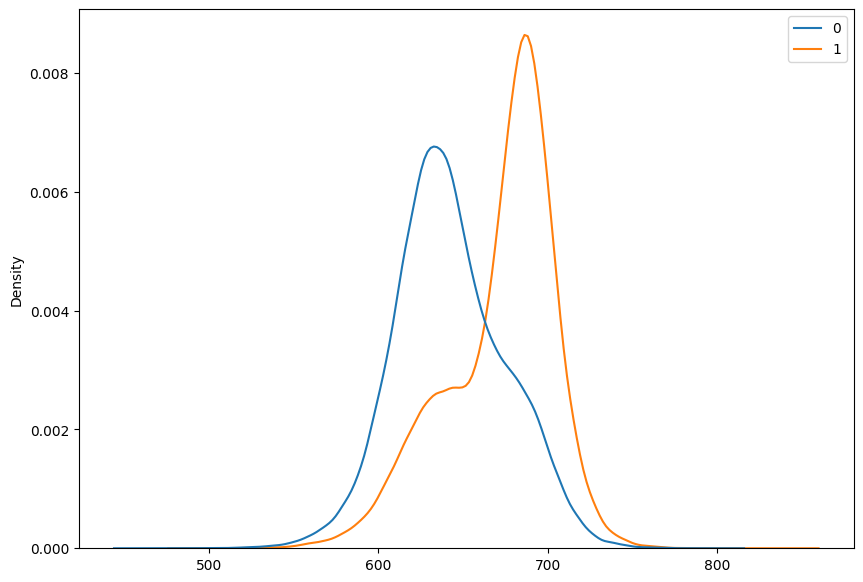

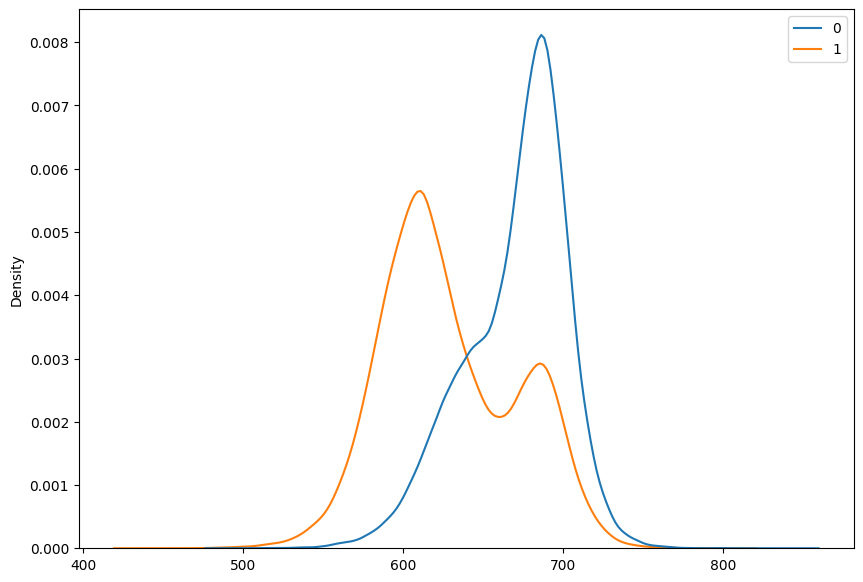

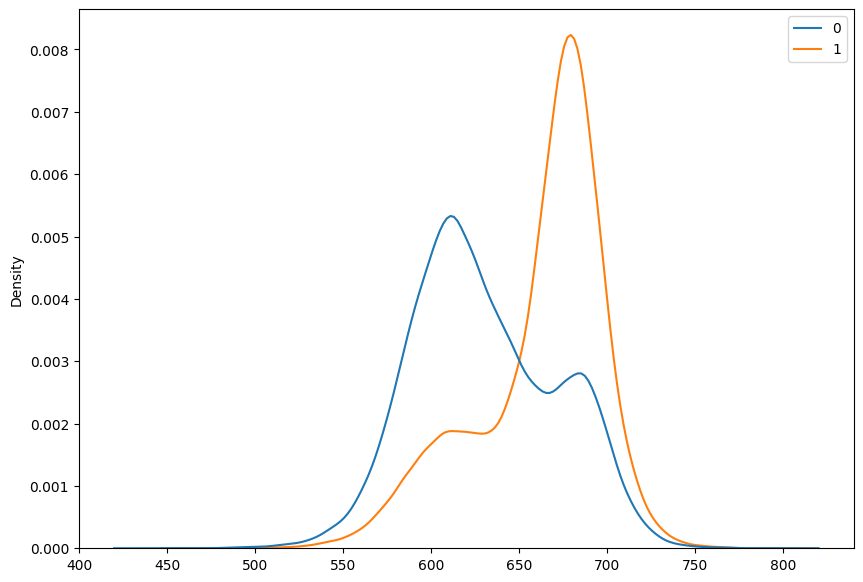

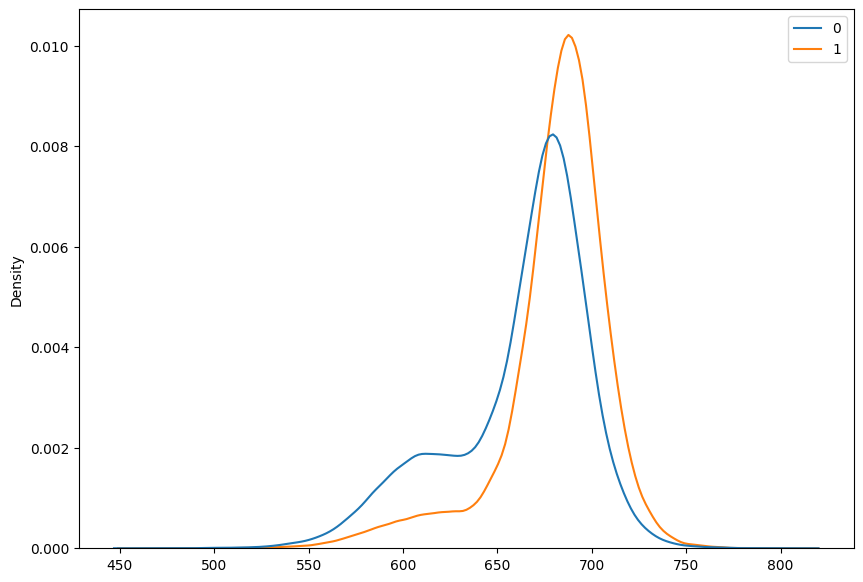

In [13]:
for idx, i in enumerate(index_1[1:]):
    plt.figure(figsize=(10, 7))
    sns.kdeplot([X[i - 1], X[i]])

    # print(idx, y[i])

    # value, is_drift = ks(X[i - 1], X[i])
    # print(value, is_drift)

    # value, is_drift = js(X[i - 1], X[i])
    # print(value, is_drift)

    # value, is_drift = kl_div(X[i - 1], X[i])
    # print(value, is_drift)

    # value, is_drift = psi(X[i - 1], X[i])
    # print(value, is_drift)

    # value, is_drift = wd(X[i - 1], X[i])
    # print(value, is_drift, "\n")